In [1]:
from __future__ import print_function
import sys
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import os
import glob

#matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi'] # larger image
#matplotlib.rcParams['figure.figsize']= (20.0, 10.0) # larger image


print("Python version:\n{}\n".format(sys.version))
print("matplotlib version: {}".format(matplotlib.__version__))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

Python version:
3.7.8 | packaged by conda-forge | (default, Jul 31 2020, 02:25:08) 
[GCC 7.5.0]

matplotlib version: 3.3.3
pandas version: 1.1.4
numpy version: 1.19.4
seaborn version: 0.11.0


### Load the data

In [2]:
root_path = '../2-Run1'  # The path to the directory containing the systems

igbs = ['igb1', 'igb2', 'igb5', 'igb7', 'igb8']  # Each of the systems as named in their directory

ffs = ['ff94','ff96','ff98','ff99', 'ff99SB', 'ff99SBildn', 'ff99SBnmr', 'ff03.r1', 'ff14SB', \
       'ff14SBonlysc','ff14ipq','fb15','ff15ipq']  # The name of the state directories

filename_pattern = 'helicity.dat'  # The glob to match the data files to read

dfs = {}  # Mapping of system name to list of state DataFrames

igbff_all = []
for ff in ffs:
    #igbff_all = []
    for igb in igbs:
        direc=igb + '_'+ ff
        # For each system and state, grab all the data files that match the glob
        file_glob = os.path.join(root_path, direc, filename_pattern)
        files = glob.glob(file_glob)
        for f in files:
            # Read each into a file to be put into a dict
            df = pd.read_csv(f, sep=r'\s+', skiprows=2501, names=['Frame', 'Fraction helicity'])
            df[r'Time ($\mu$s)'] = (df['Frame']-2501)/10000
            df['Helicity (%)'] = df['Fraction helicity']*100*33/31
            df['Mouving average']=pd.Series.rolling(df['Helicity (%)'],window=500,center=False).mean()
            df['igb'] = igb
            df['ff'] = ff
            df['ffigb'] = '{0} {1}'.format(ff, igb)
            df['igbff'] = '{0} {1}'.format(igb, ff)
            igbff_all.append(df)
df_total = pd.concat(igbff_all)
print(df_total.head())

   Frame  Fraction helicity  Time ($\mu$s)  Helicity (%)  Mouving average  \
0   2501              0.818         0.0000     87.077419              NaN   
1   2502              0.879         0.0001     93.570968              NaN   
2   2503              0.848         0.0002     90.270968              NaN   
3   2504              0.818         0.0003     87.077419              NaN   
4   2505              0.848         0.0004     90.270968              NaN   

    igb    ff      ffigb      igbff  
0  igb1  ff94  ff94 igb1  igb1 ff94  
1  igb1  ff94  ff94 igb1  igb1 ff94  
2  igb1  ff94  ff94 igb1  igb1 ff94  
3  igb1  ff94  ff94 igb1  igb1 ff94  
4  igb1  ff94  ff94 igb1  igb1 ff94  


In [3]:
print(df_total.tail())

       Frame  Fraction helicity  Time ($\mu$s)  Helicity (%)  Mouving average  \
57495  59996              0.242         5.7495     25.761290        27.079374   
57496  59997              0.152         5.7496     16.180645        27.066600   
57497  59998              0.394         5.7497     41.941935        27.124723   
57498  59999              0.485         5.7498     51.629032        27.176458   
57499  60000              0.424         5.7499     45.135484        27.195832   

        igb       ff         ffigb         igbff  
57495  igb8  ff15ipq  ff15ipq igb8  igb8 ff15ipq  
57496  igb8  ff15ipq  ff15ipq igb8  igb8 ff15ipq  
57497  igb8  ff15ipq  ff15ipq igb8  igb8 ff15ipq  
57498  igb8  ff15ipq  ff15ipq igb8  igb8 ff15ipq  
57499  igb8  ff15ipq  ff15ipq igb8  igb8 ff15ipq  


DSSP value of the fully helical version of the peptide:

In [3]:
90.9*33/31

96.76451612903227

### Helicity time series

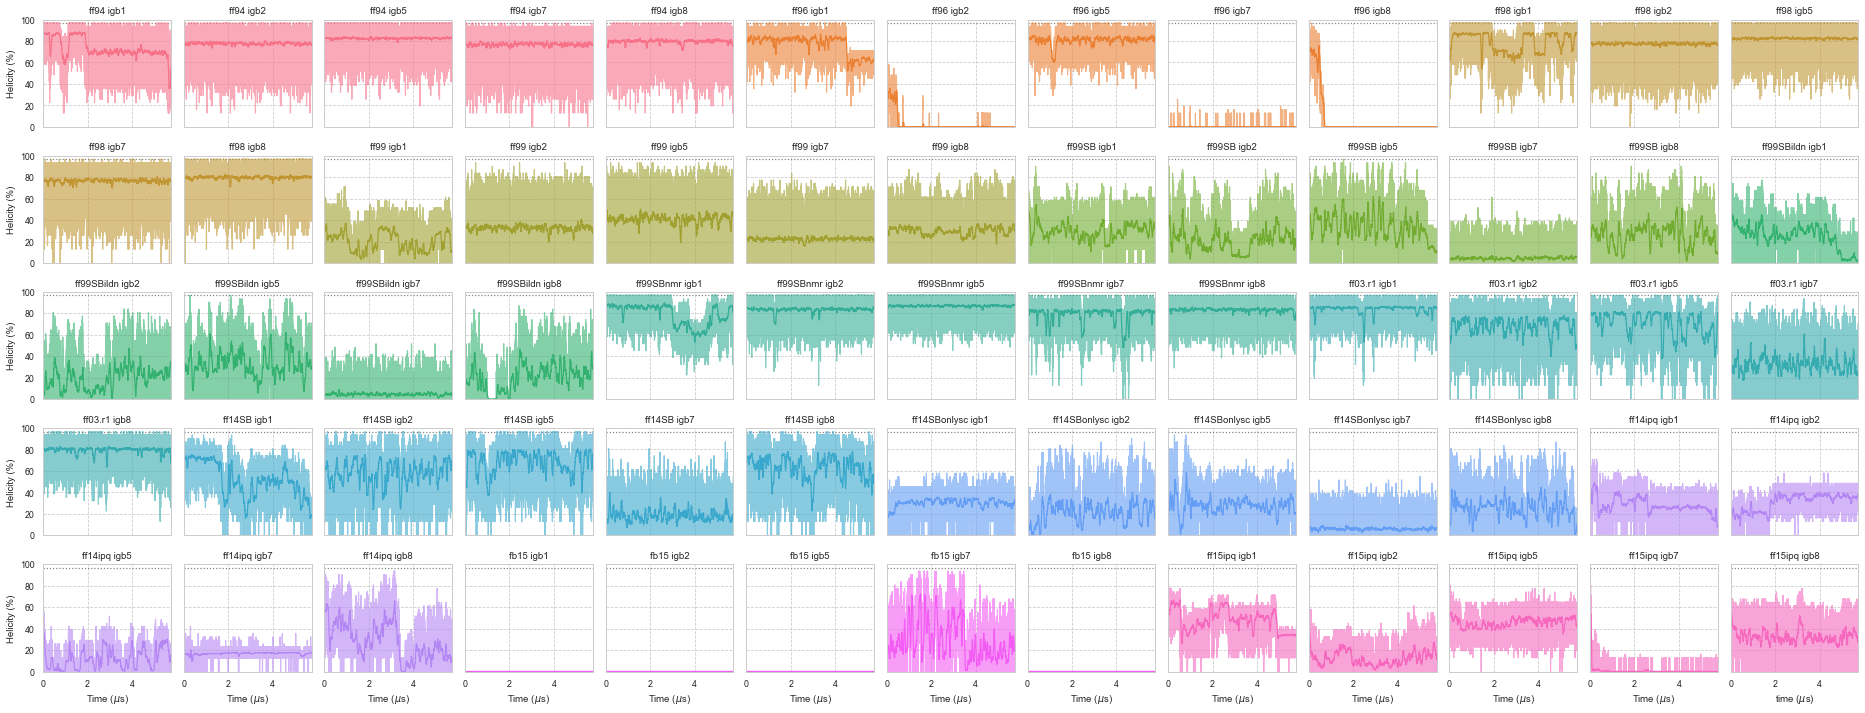

In [12]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=1, rc={'grid.linestyle': '--'})

grid = sns.FacetGrid(df_total, col="ffigb", col_wrap=13, hue="ff", height=2, aspect=1,\
                     sharex=True, sharey=True, despine=False, legend_out=False)


# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=96.76, ls=":", c=".5") # 90.9*33/31

grid.map(plt.plot, r'Time ($\mu$s)', 'Mouving average').set_titles("{col_name}")
grid.map(plt.plot, r'Time ($\mu$s)', 'Helicity (%)', alpha=0.6).set_titles("{col_name}")
# Adjust the tick positions and labels
#grid.set(xticks=np.arange(5), yticks=[-3, 3],
         #xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
#grid.fig.tight_layout(w_pad=1)
grid.set(xlim=(0, 5.75) , ylim=(0, 100))
plt.xlabel(r'time ($\mu$s)')
#plt.ylabel('Percentage helicity (%)')
plt.tight_layout()
plt.savefig('./plots/helicity3_2.pdf')
plt.savefig('./plots/helicity3_2.png', dpi=300)
plt.show()

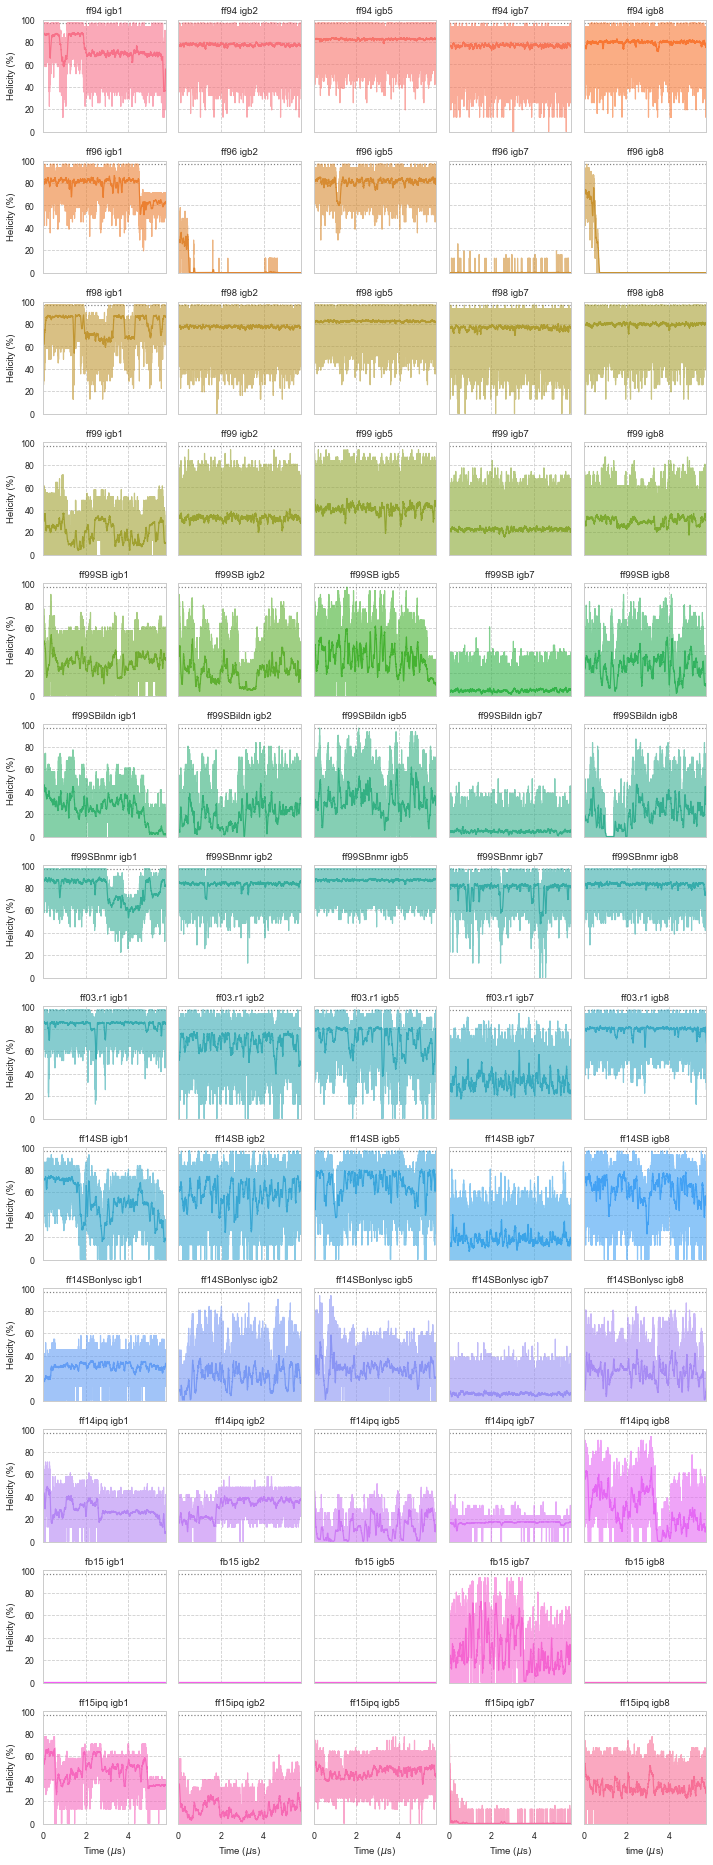

In [9]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=1, rc={'grid.linestyle': '--'})

grid = sns.FacetGrid(df_total, col="ffigb", col_wrap=5, hue="ffigb", height=2, aspect=1,\
                     sharex=True, sharey=True, despine=False, legend_out=False)


# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=96.76, ls=":", c=".5") # 90.9*33/31

grid.map(plt.plot, r'Time ($\mu$s)', 'Mouving average').set_titles("{col_name}")
grid.map(plt.plot, r'Time ($\mu$s)', 'Helicity (%)', alpha=0.6).set_titles("{col_name}")
# Adjust the tick positions and labels
#grid.set(xticks=np.arange(5), yticks=[-3, 3],
         #xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
#grid.fig.tight_layout(w_pad=1)
grid.set(xlim=(0, 5.75) , ylim=(0, 100))
plt.xlabel(r'time ($\mu$s)')
#plt.ylabel('Percentage helicity (%)')
plt.tight_layout()
plt.savefig('./plots/helicity3_1.pdf')
plt.savefig('./plots/helicity3_1.png', dpi=300)
plt.show()

### Testing the things

In [4]:
df_total

,Frame,Fraction helicity,Time ($\mu$s),Helicity (%),Mouving average,igb,ff,ffigb,igbff
0,1,0.848,0.0001,90.270968,NaN,igb1,ff94,ff94 igb1,igb1 ff94
1,2,0.758,0.0002,80.690323,NaN,igb1,ff94,ff94 igb1,igb1 ff94
2,3,0.879,0.0003,93.570968,NaN,igb1,ff94,ff94 igb1,igb1 ff94
3,4,0.848,0.0004,90.270968,NaN,igb1,ff94,ff94 igb1,igb1 ff94
4,5,0.879,0.0005,93.570968,NaN,igb1,ff94,ff94 igb1,igb1 ff94
...,...,...,...,...,...,...,...,...,...
59995,59996,0.242,5.9996,25.761290,27.079374,igb8,ff15ipq,ff15ipq igb8,igb8 ff15ipq
59996,59997,0.152,5.9997,16.180645,27.066600,igb8,ff15ipq,ff15ipq igb8,igb8 ff15ipq
59997,59998,0.394,5.9998,41.941935,27.124723,igb8,ff15ipq,ff15ipq igb8,igb8 ff15ipq
59998,59999,0.485,5.9999,51.629032,27.176458,igb8,ff15ipq,ff15ipq igb8,igb8 ff15ipq


In [5]:
temp=df_total.drop(columns=['Frame', 'Fraction helicity', r'Time ($\mu$s)', 'Mouving average', 'igb','ff' ])
temp

,Helicity (%),ffigb,igbff
0,90.270968,ff94 igb1,igb1 ff94
1,80.690323,ff94 igb1,igb1 ff94
2,93.570968,ff94 igb1,igb1 ff94
3,90.270968,ff94 igb1,igb1 ff94
4,93.570968,ff94 igb1,igb1 ff94
...,...,...,...
59995,25.761290,ff15ipq igb8,igb8 ff15ipq
59996,16.180645,ff15ipq igb8,igb8 ff15ipq
59997,41.941935,ff15ipq igb8,igb8 ff15ipq
59998,51.629032,ff15ipq igb8,igb8 ff15ipq


In [6]:
grouped=temp.groupby(['igbff'])
grouped

In [7]:
grouped.std()

,Helicity (%)
igbff,
igb1 fb15,3.059155
igb1 ff03.r1,7.873248
igb1 ff14SB,18.902845
igb1 ff14SBonlysc,9.518143
igb1 ff14ipq,11.359988
...,...
igb8 ff98,10.578163
igb8 ff99,14.371592
igb8 ff99SB,16.730622


In [8]:
grouped.mean()

,Helicity (%)
igbff,
igb1 fb15,0.321392
igb1 ff03.r1,83.940136
igb1 ff14SB,52.776490
igb1 ff14SBonlysc,30.057411
igb1 ff14ipq,28.604404
...,...
igb8 ff98,79.582866
igb8 ff99,29.912502
igb8 ff99SB,26.584784


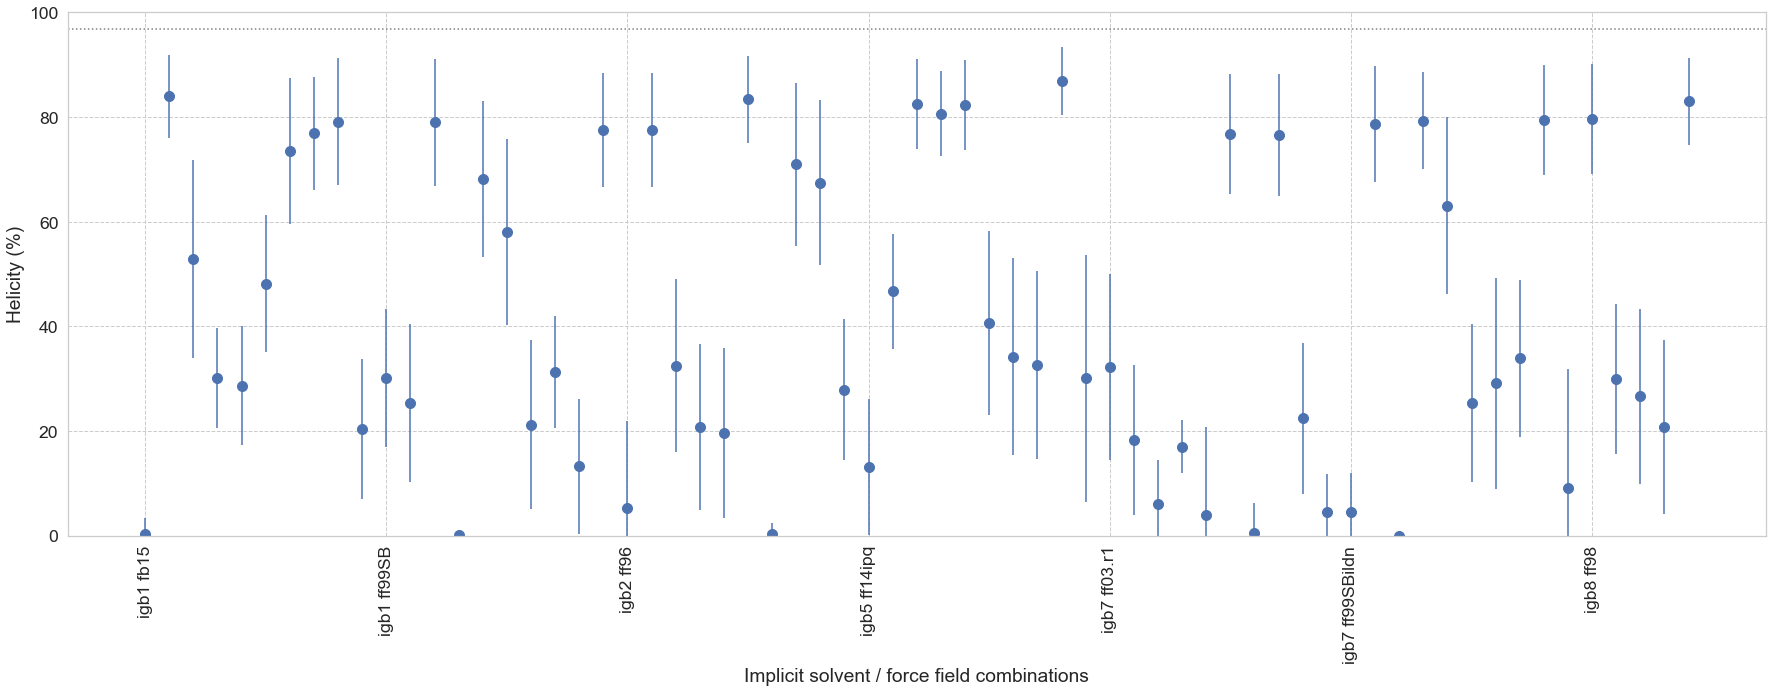

In [14]:
mean = grouped.mean()

errors = grouped.std()


ax=mean.plot(yerr=errors,figsize=(25,10), ylim=(0, 100), legend=False, rot=90,
             linestyle='None', markersize = 10.0,marker='o')
            
ax.set_ylabel('Helicity (%)')
ax.set_xlabel('Implicit solvent / force field combinations')
plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31

plt.tight_layout()
plt.savefig('./helicity_avg.pdf')
plt.savefig('./helicity_avg.png')
#plt.show()

### Helicity box plots

In the first plot, wiskers incorporate all the data:

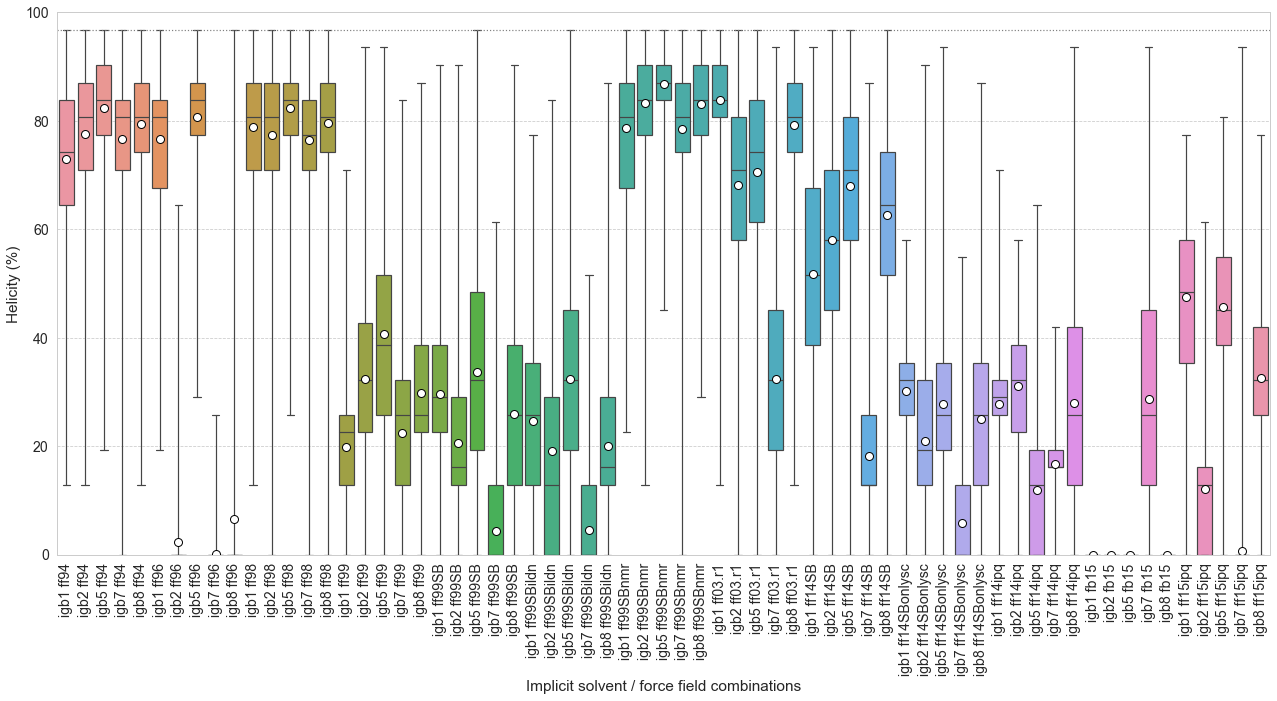

In [9]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=1.6, rc={'grid.linestyle': '--'})

fig, axes = plt.subplots(figsize=(18, 10))

ax=sns.boxplot(x='igbff', y='Helicity (%)', data=df_total, fliersize=2,whis=[0, 100],
               showmeans=True,
               meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"8"})
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('Implicit solvent / force field combinations')
plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31

plt.tight_layout()

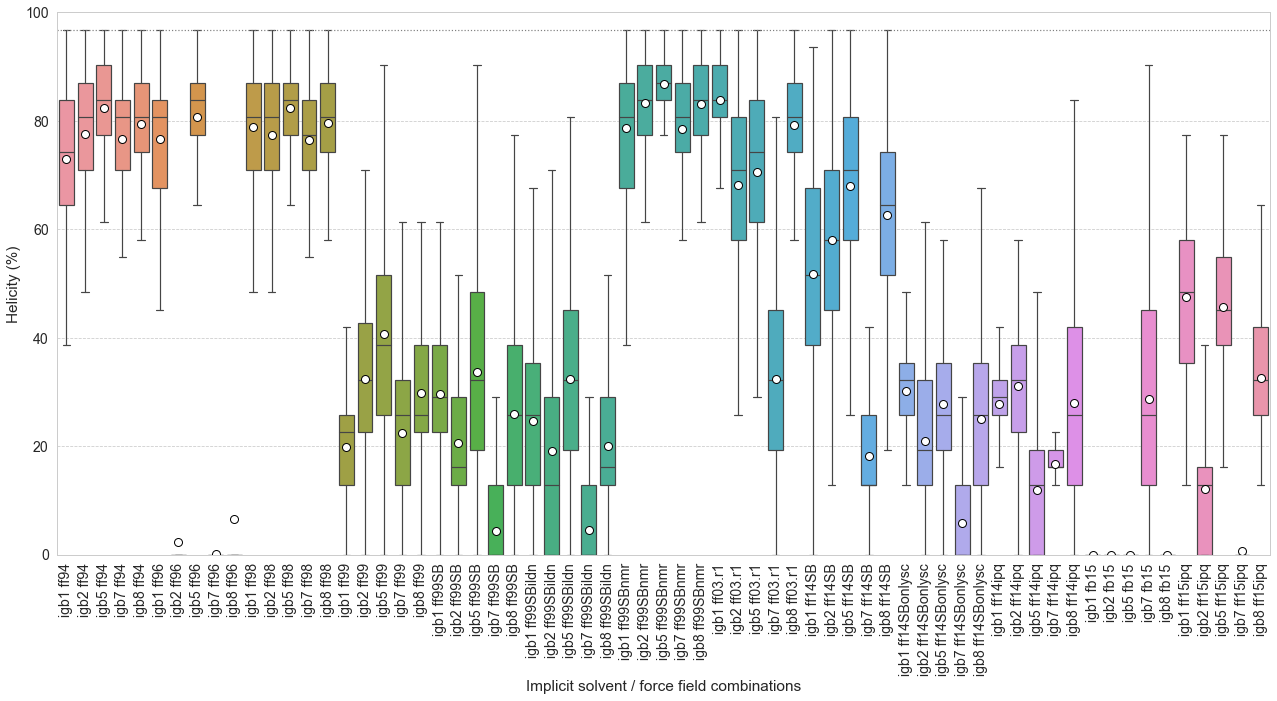

In [13]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=1.6, rc={'grid.linestyle': '--'})

fig, axes = plt.subplots(figsize=(18, 10))

ax=sns.boxplot(x='igbff', y='Helicity (%)', data=df_total, fliersize=0,
               showmeans=True,
               meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"8"})
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('Implicit solvent / force field combinations')
plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31

plt.tight_layout()
plt.savefig('./plots/helicity_boxplot3_1.pdf')
plt.savefig('./plots/helicity_boxplot3_1.png', dpi=300)

### Average helicity and std dev

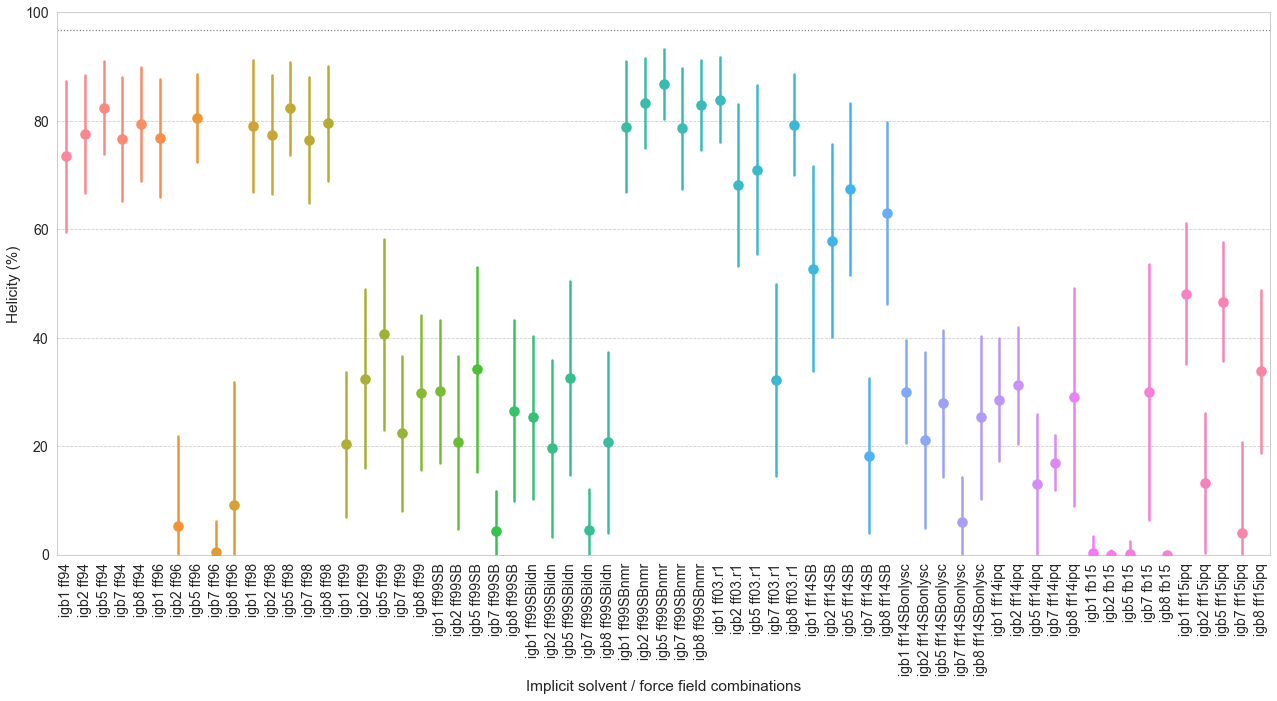

In [30]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=1.6, rc={'grid.linestyle': '--'})

fig, axes = plt.subplots(figsize=(18, 10))

ax=sns.pointplot(x='igbff', y='Helicity (%)', data=df_total, hue="igbff", join=False, ci="sd",
                markers="o", scale = 1.5, errwidth=2.5)

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('Implicit solvent / force field combinations')
ax.get_legend().remove()
plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31

plt.tight_layout()
plt.savefig('./plots/helicity_mean_sd.png', dpi=400)

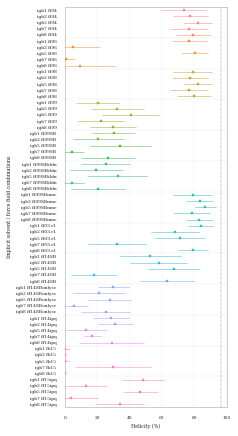

In [68]:
sns.set(context='paper', style='whitegrid', palette='deep', font='serif',\
        font_scale=0.5, rc={'grid.linestyle': '--','grid.linewidth': '0.2'})

fig, axes = plt.subplots(figsize=(3.25, 6))

ax=sns.pointplot(y='igbff', x='Helicity (%)', data=df_total, hue="igbff", join=False, ci="sd",
                markers="s", orient="h", scale=0.25, errwidth=0.5)

ax.set_xlim([0, 100])  
ax.set_ylabel('Implicit solvent / force field combinations')
ax.get_legend().remove()
ax.yaxis.grid(True, which='minor')

plt.axvline(x=96.76, ls='-.', c=".5",lw=0.4 ) # 90.9*33/31

plt.axhline(y=4.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=9.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=14.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=19.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=24.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=29.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=34.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=39.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=44.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=49.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=54.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=59.5, ls='--', c=".75",lw=0.2 )

plt.tight_layout()
plt.savefig('./plots/helicity_mean_sd_2.png', dpi=400)

In [ ]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=1.6, rc={'grid.linestyle': '--'})

fig, ax = plt.subplots(figsize=(18, 10))

g=sns.catplot(x='ff', y='Helicity (%)', data=df_total, hue="igb", kind='bar')
#                join=False, ci="sd",
#                 markers="o", scale = 1.5, errwidth=2.5)

# ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
# g.set_ylim([0, 100])  
# g.set_xlabel('Implicit solvent / force field combinations')
# g.get_legend().remove()
# plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31

plt.tight_layout()
# plt.savefig('./plots/helicity_mean_sd_3.png', dpi=400)

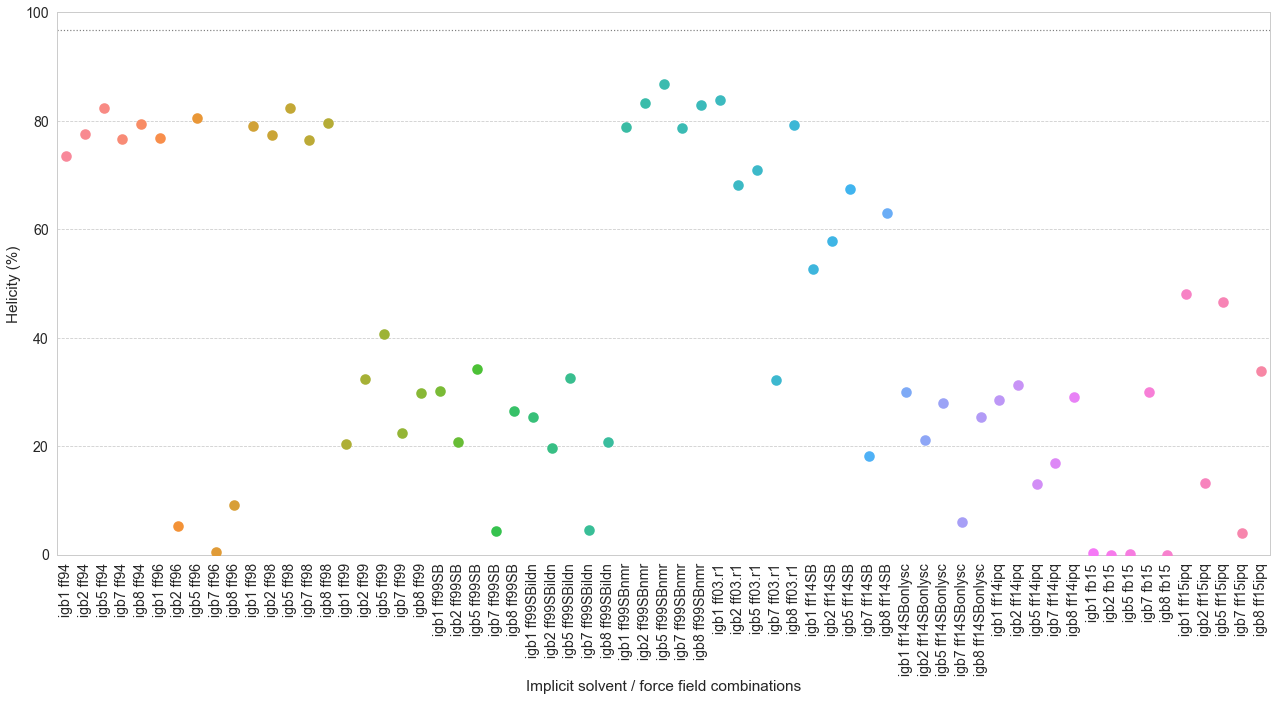

In [66]:
sns.set(context='paper', style='whitegrid', palette='deep', font='serif',\
        font_scale=0.5, rc={'grid.linestyle': '--','grid.linewidth': '0.2'})

fig, axes = plt.subplots(figsize=(3.25, 6))

ax=sns.pointplot(y='igbff', x='Helicity (%)', data=df_total, hue="igbff", join=False, ci="sd",
                markers="s", orient="h", scale=0.25, errwidth=0.5)

ax.set_xlim([0, 100])  
ax.set_ylabel('Implicit solvent / force field combinations')
ax.get_legend().remove()
ax.yaxis.grid(True, which='minor')

plt.axvline(x=96.76, ls='-.', c=".5",lw=0.4 ) # 90.9*33/31

plt.axhline(y=4.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=9.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=14.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=19.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=24.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=29.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=34.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=39.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=44.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=49.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=54.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=59.5, ls='--', c=".75",lw=0.2 )

plt.tight_layout()
plt.savefig('./plots/helicity_mean_sd_4.png', dpi=400)